In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv('bank/bank.csv',sep=';')
col_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
col_num = ['age','balance','day','duration','campaign','pdays','previous']
data_categorical = pd.get_dummies(data[col_cat])
data_numerical = data[col_num]
data_set = pd.concat([data_categorical,data_numerical],axis = 1)

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X =data_set.values
y = data['y']
y = y.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)
feat_selector.support_
feat_selector.ranking_
X_filtered = feat_selector.transform(X)

x_feat = data_set.copy()
drop_col = x_feat.columns[feat_selector.ranking_ > 1]
x_feat.drop(drop_col,axis = 1, inplace=True)

In [2]:
y[y== 'no'] = -1
y[y == 'yes'] = 1

y=y.astype('str')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, test_size=0.30, random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [3]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train,y_train)
predicted_label = svclassifier.predict(x_test)



 Classification Report
             precision    recall  f1-score   support

         -1       0.89      0.99      0.94      1190
          1       0.71      0.14      0.24       167

avg / total       0.87      0.89      0.85      1357

Confusion Metrics: 
 [[1180   10]
 [ 143   24]]


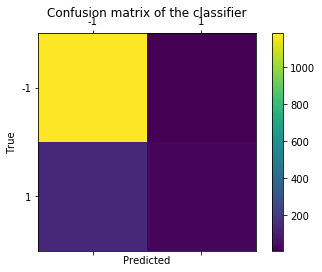

Test Accuracy of svm is 88.73%


In [4]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_label)
print(f' Classification Report\n{report}')

from sklearn import metrics
labels=['-1','1']
cm = metrics.confusion_matrix(y_test, predicted_label, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=svclassifier.score(x_test,y_test)*100
print(f'Test Accuracy of svm is {round(score,2)}%')

In [5]:
# with Radial Basis Function 
# from sklearn import metrics
svclassifier = SVC(kernel = 'rbf')
svclassifier.fit(x_train,y_train)
predicted_label = svclassifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, predicted_label, labels)
score=svclassifier.score(x_test,y_test)*100
print(f'Test Accuracy of svm is {round(score,2)}%')

Test Accuracy of svm is 88.95%
